<font color=navy size=6>**Entradas de sistemas atómico-moleculares pyscf**
    
<font color=navy size=5>**Enrique Mejía Ospino**
    
<font color=navy size=5>**Química Cuántica Avanzada**
    
<font color=navy size=5>**Universidad Industrial de Santander**

In [9]:
import numpy as np
from pyscf import *
import matplotlib.pyplot as plt
import pandas as pd

In [149]:
mol1 = gto.Mole()
mol1.atom ='''
O 0 0 0
H 0 1 0
H 0 0 1
'''
mol1.build()
rhf_h2o = scf.RHF(mol1)
e_h2o = rhf_h2o.kernel()

converged SCF energy = -74.9611711378677


In [150]:
mol2 = gto.Mole()
mol2.atom = '''
    O
    H  1  1.2
    H  1  1.2  2 105
'''
mol2.build()
rhf_h2o_2 = scf.RHF(mol2)
e_h2o_2 = rhf_h2o_2.kernel()

converged SCF energy = -74.8948869772035


In [151]:
mol3 = gto.Mole()
r=1.2
mol3.atom = [["H", 0., 0., 0.], ["H", 0., 0., r ]]
mol3.build()
rhf_h2_3 = scf.RHF(mol3)
e_h2_3 = rhf_h2o_3.kernel()

converged SCF energy = -1.00510670656849


In [152]:
mol4 = gto.Mole()
mol4.atom = '''8 0 0 0; h 0 1 0; H 0 0 1'''
mol4.build()
rhf_h2_2 = scf.RHF(mol4)
e_h2_2 = rhf_h2_2.kernel()

converged SCF energy = -74.9611711378677


<font color=black size=4>**Las moléculas pueden ser importadas de un archivo en formato *xyz* y convertidas en una geometría de *pyscf* muy facilemente de esta forma:**

In [153]:
mol5 = gto.Mole()
mol5.atom='./molecules/benzene.xyz'
mol5.build()
rhf_ben = scf.RHF(mol5)
e_ben = rhf_ben.kernel()

converged SCF energy = -227.890084251103


<font color=navy size=5>**Importación y Graficación de Moléculas**

<font color=green size=4>**Otra alternativa es utilizar el formato *SMILE*, existe un modulo llamado *RDkit* que, entre otras cosas, puede leer, graficar geometrías moleculares en este formato y convertirlas en geometrías de *xyz* que pueden ser leídas en *pyscf*, aquí va un ejemplo:**

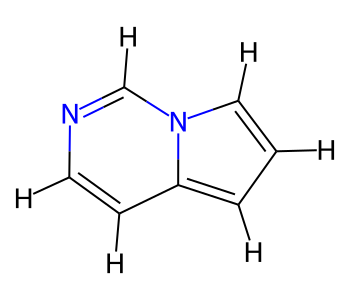

In [64]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 350,300
doravirine = Chem.MolFromSmiles('c1nccc2n1ccc2')
doravirine = Chem.AddHs(doravirine)
AllChem.EmbedMolecule(doravirine)
AllChem.MMFFOptimizeMolecule(doravirine)
doravirine

In [65]:
Chem.rdmolfiles.MolToXYZFile(doravirine, './molecules/dor.xyz')
mol = gto.Mole()
mol.atom= './molecules/dor.xyz'
mol.build()
rhf_dor = scf.RHF(mol)
e_h2o = rhf_dor.kernel()

converged SCF energy = -372.756320144927


In [44]:
print(Chem.MolToXYZBlock(doravirine))

15

C     -1.130406    1.353163   -0.324450
N     -2.261360    0.706990   -0.329819
C     -2.194384   -0.654824   -0.106035
C     -1.067736   -1.355953    0.113953
C      0.162501   -0.659632    0.120865
N      0.082181    0.697107   -0.103389
C      1.347252    1.233229   -0.067548
C      2.236974    0.207930    0.181434
C      1.486806   -0.990996    0.300846
H     -1.109336    2.440955   -0.496054
H     -3.151737   -1.171242   -0.115453
H     -1.095048   -2.426830    0.282238
H      1.507456    2.291735   -0.221090
H      3.311403    0.310568    0.268127
H      1.875435   -1.982201    0.496375



<font color=orange size=4>**Uno de los modulas más utilizados para grafica moléculas en *python* es *py3Dmol*, aquí construimos una función basdos en este modulo, que nos permitirá graficar las moléculas ue deseamos trabajar con MC:**

In [78]:
import py3Dmol as p3d

def drawPsi4Geom(mol):
    xyz = mol 
    view = p3d.view(width=400, height=400)
    view.addModel(xyz, "xyz")
    view.setStyle({'stick':{}})
    view.zoomTo()
    return(view.show())

In [79]:
drawPsi4Geom('dor.xyz')

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

<font color=blue size=5>**Para mostrar los conformeros**

In [80]:
import ipywidgets
from ipywidgets import interact, interactive, fixed, widgets
AllChem.EmbedMultipleConfs(doravirine,numConfs=10,randomSeed=0xf00d,useExpTorsionAnglePrefs=True, useBasicKnowledge=True)
def drawRdkitMolConf(mol,confId):
    mb = Chem.MolToMolBlock(mol,confId=confId)
    view = p3d.view(width=400,height=400)
    view.removeAllModels()
    view.addModel(mb,'sdf')
    view.setStyle({'stick':{}})
    view.zoomTo()
    return view.show()

def drawRdkitMolSlider(mol):
    interact(drawRdkitMolConf, mol=fixed(mol), confId=widgets.IntSlider(min=0, max=mol.GetNumConformers()-1))

In [81]:
drawRdkitMolSlider(doravirine)

interactive(children=(IntSlider(value=0, description='confId', max=9), Output()), _dom_classes=('widget-intera…

In [96]:
import py3Dmol
view = py3Dmol.view(query='pdb:2POR')
view.setStyle({'stick':{'color':'spectrum'}})
view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [110]:
view = py3Dmol.view(query='cid:5284583')# corresponde al cid pubchem
view.setStyle({'stick':{'color':'spectrum'}}) # 'line', 'stick', 'sphere'
view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [99]:
v2_H2O = '''3

O            0.000000000000     0.000000000000    -0.063241040968    -0.00 -0.00  0.05
H            0.000000000000    -0.763664017586     0.501840606446    -0.00  0.58 -0.40
H            0.000000000000     0.763664017586     0.501840606446    -0.00 -0.58 -0.40
'''

In [104]:
view_m2 = py3Dmol.view(width=200,height=200)
view_m2.addModel(v2_H2O,'v2_H2O',{'vibrate': {'frames':20,'amplitude':1}})
view_m2.setStyle({'stick':{}})
#xyzview.setBackgroundColor('0xeeeeee')
view_m2.animate({'loop': 'backAndForth'})
view_m2.zoomTo()
view_m2.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [130]:
#from pyscf import gto, scf
mol = gto.Mole()
mol.verbose = 5
#mol.output = 'N2.txt'
mol.atom='N 0 0 0; N 0 0 1.2'
mol.basis='ccpvdz'
mol.build()
mf = scf.RHF(mol)
mf.kernel()
# geometric
#from pyscf.geomopt.geometric_solver import optimize
#mol_eq = optimize(mf, maxsteps=100)
#print(mol_eq.atom_coords())

# pyberny
from pyscf.geomopt.berny_solver import optimize
mol_eq = optimize(mf, maxsteps=100)
#lib.chkfile.save_mol(mol_eq, 'N2.chk')
#print(mol_eq.atom_coords())

System: uname_result(system='Linux', node='lab-203-2', release='4.4.0-19041-Microsoft', version='#2311-Microsoft Tue Nov 08 17:09:00 PST 2022', machine='x86_64', processor='x86_64')  Threads 12
Python 3.8.11 (default, Aug  3 2021, 15:09:35) 
[GCC 7.5.0]
numpy 1.22.4  scipy 1.6.2
Date: Wed Mar  1 17:53:07 2023
PySCF version 2.1.1
PySCF path  /home/emejia/psi4conda/lib/python3.8/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 5
[INPUT] max_memory = 4000 
[INPUT] num. atoms = 2
[INPUT] num. electrons = 14
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 N      0.000000000000   0.000000000000   0.000000000000 AA    0.000000000000   0.000000000000   0.000000000000 Bohr   0.0
[INPUT]  2 N      0.000000000000   0.000000000000   1.200000000000 AA    0.000000

0 Internal coordinates:

0 * Number of fragments: 1


0 * Number of fragments: 1

0 * Number of internal coordinates: 1


0 * Number of internal coordinates: 1

0 * Number of strong bonds: 1


0 * Number of strong bonds: 1


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   N   0.000000   0.000000   1.200000    0.000000  0.000000  0.000000
New geometry
   1 N      0.000000000000   0.000000000000   0.000000000000 AA    0.000000000000   0.000000000000   0.000000000000 Bohr

   2 N      0.000000000000   0.000000000000   1.200000000000 AA    0.000000000000   0.000000000000   2.267671349478 Bohr



******** <class 'pyscf.scf.hf.as_scanner.<locals>.SCF_Scanner'> ********
method = SCF_Scanner-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/emejia/Documents/QC_Notebook/tmplmsnzr6g
max_memory 4000 MB (current use 137 MB)
Set gradient c

1 Energy: -108.914051975

1 Minimization on sphere was performed:


1 Minimization on sphere was performed:

1 * Trust radius: 0.3


1 * Trust radius: 0.3

1 * Number of negative eigenvalues: 0


1 * Number of negative eigenvalues: 0

1 * Lowest eigenvalue: 0.55


1 * Lowest eigenvalue: 0.55

1 * lambda: -0.491


1 * lambda: -0.491

1 Quadratic step: RMS: 0.3, max: 0.3


1 Quadratic step: RMS: 0.3, max: 0.3

1 * Predicted energy change: -0.0689


1 * Predicted energy change: -0.0689

1 Total step: RMS: 0.3, max: 0.3


1 Total step: RMS: 0.3, max: 0.3

1 Perfect transformation to cartesians in 2 iterations


1 Perfect transformation to cartesians in 2 iterations

1 * RMS(dcart): 2.27e-17, RMS(dq): 4.44e-16


1 * RMS(dcart): 2.27e-17, RMS(dq): 4.44e-16

1 Convergence criteria:


1 Convergence criteria:

1 * Gradient RMS: 0.312 > 0.00015 => no


1 * Gradient RMS: 0.312 > 0.00015 => no

1 * Gradient maximum: 0.312 > 0.00045 => no


1 * Gradient maximum: 0.312 > 0.00045 => no

1 * Minimization on sphere: Minimization on sphere => no


1 * Minimization on sphere: Minimization on sphere => no

    CPU time for geomoetry optimization cycle 0      1.41 sec, wall time      0.30 sec

Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.079377    0.000000  0.000000  0.079377
   N   0.000000   0.000000   1.120623    0.000000  0.000000 -0.079377
New geometry
   1 N      0.000000000000   0.000000000000   0.079376581638 AA    0.000000000000   0.000000000000   0.150000000000 Bohr

   2 N      0.000000000000   0.000000000000   1.120623418362 AA    0.000000000000   0.000000000000   2.117671349478 Bohr


WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.



******** <class 'pyscf.scf.hf.as_scanner.<locals>.SCF_Scanner'> ********
method = SCF_Scanner-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_to

2 Energy: -108.950478289

2 Hessian update information:


2 Hessian update information:

2 * Change: RMS: 1.01, max: 1.01


2 * Change: RMS: 1.01, max: 1.01

2 Trust update: Fletcher's parameter: 0.529


2 Trust update: Fletcher's parameter: 0.529

2 Linear interpolation:


2 Linear interpolation:

2 * Energies: -108.95048, -108.91405


2 * Energies: -108.95048, -108.91405

2 * Derivatives: -0.0466, 0.0936


2 * Derivatives: -0.0466, 0.0936

2 * Quartic interpolation was performed: t = 0.23


2 * Quartic interpolation was performed: t = 0.23

2 * Interpolated energy: -108.95564


2 * Interpolated energy: -108.95564

2 Pure RFO step was performed:


2 Pure RFO step was performed:

2 * Trust radius: 0.3


2 * Trust radius: 0.3

2 * Number of negative eigenvalues: 0


2 * Number of negative eigenvalues: 0

2 * Lowest eigenvalue: 1.56


2 * Lowest eigenvalue: 1.56

2 * lambda: -0.00148


2 * lambda: -0.00148

2 Quadratic step: RMS: 0.0308, max: 0.0308


2 Quadratic step: RMS: 0.0308, max: 0.0308

2 * Predicted energy change: -0.000739


2 * Predicted energy change: -0.000739

2 Total step: RMS: 0.0997, max: 0.0997


2 Total step: RMS: 0.0997, max: 0.0997

2 Perfect transformation to cartesians in 2 iterations


2 Perfect transformation to cartesians in 2 iterations

2 * RMS(dcart): 0.0, RMS(dq): 0.0


2 * RMS(dcart): 0.0, RMS(dq): 0.0

2 Convergence criteria:


2 Convergence criteria:

2 * Gradient RMS: 0.155 > 0.00015 => no


2 * Gradient RMS: 0.155 > 0.00015 => no

2 * Gradient maximum: 0.155 > 0.00045 => no


2 * Gradient maximum: 0.155 > 0.00045 => no

2 * Step RMS: 0.0997 > 0.0012 => no


2 * Step RMS: 0.0997 > 0.0012 => no

2 * Step maximum: 0.0997 > 0.0018 => no


2 * Step maximum: 0.0997 > 0.0018 => no

    CPU time for geomoetry optimization cycle 1      4.36 sec, wall time      0.69 sec

Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.053007    0.000000  0.000000 -0.026370
   N   0.000000   0.000000   1.146993    0.000000  0.000000  0.026370
New geometry
   1 N      0.000000000000   0.000000000000   0.053006882494 AA    0.000000000000   0.000000000000   0.100168490631 Bohr

   2 N      0.000000000000   0.000000000000   1.146993117506 AA    0.000000000000   0.000000000000   2.167502858847 Bohr


WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.



******** <class 'pyscf.scf.hf.as_scanner.<locals>.SCF_Scanner'> ********
method = SCF_Scanner-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_to

3 Energy: -108.954593583

3 Hessian update information:


3 Hessian update information:

3 * Change: RMS: 0.603, max: 0.603


3 * Change: RMS: 0.603, max: 0.603

3 Trust update: Fletcher's parameter: 5.57


3 Trust update: Fletcher's parameter: 5.57

3 Linear interpolation:


3 Linear interpolation:

3 * Energies: -108.95459, -108.95048


3 * Energies: -108.95459, -108.95048

3 * Derivatives: -0.00599, 0.0155


3 * Derivatives: -0.00599, 0.0155

3 * Quartic interpolation was performed: t = 0.317


3 * Quartic interpolation was performed: t = 0.317

3 * Interpolated energy: -108.95556


3 * Interpolated energy: -108.95556

3 Pure RFO step was performed:


3 Pure RFO step was performed:

3 * Trust radius: 0.3


3 * Trust radius: 0.3

3 * Number of negative eigenvalues: 0


3 * Number of negative eigenvalues: 0

3 * Lowest eigenvalue: 2.16


3 * Lowest eigenvalue: 2.16

3 * lambda: -3.07e-05


3 * lambda: -3.07e-05

3 Quadratic step: RMS: 0.00377, max: 0.00377


3 Quadratic step: RMS: 0.00377, max: 0.00377

3 * Predicted energy change: -1.53e-05


3 * Predicted energy change: -1.53e-05

3 Total step: RMS: 0.0278, max: 0.0278


3 Total step: RMS: 0.0278, max: 0.0278

3 Perfect transformation to cartesians in 2 iterations


3 Perfect transformation to cartesians in 2 iterations

3 * RMS(dcart): 1.03e-16, RMS(dq): 8.88e-16


3 * RMS(dcart): 1.03e-16, RMS(dq): 8.88e-16

3 Convergence criteria:


3 Convergence criteria:

3 * Gradient RMS: 0.0601 > 0.00015 => no


3 * Gradient RMS: 0.0601 > 0.00015 => no

3 * Gradient maximum: 0.0601 > 0.00045 => no


3 * Gradient maximum: 0.0601 > 0.00045 => no

3 * Step RMS: 0.0278 > 0.0012 => no


3 * Step RMS: 0.0278 > 0.0012 => no

3 * Step maximum: 0.0278 > 0.0018 => no


3 * Step maximum: 0.0278 > 0.0018 => no

    CPU time for geomoetry optimization cycle 2      2.69 sec, wall time      0.42 sec

Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.060361    0.000000  0.000000  0.007354
   N   0.000000   0.000000   1.139639    0.000000  0.000000 -0.007354
New geometry
   1 N      0.000000000000   0.000000000000   0.060361237645 AA    0.000000000000   0.000000000000   0.114066207688 Bohr

   2 N      0.000000000000   0.000000000000   1.139638762355 AA    0.000000000000   0.000000000000   2.153605141790 Bohr


WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.



******** <class 'pyscf.scf.hf.as_scanner.<locals>.SCF_Scanner'> ********
method = SCF_Scanner-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_to

4 Energy: -108.955544787

4 Hessian update information:


4 Hessian update information:

4 * Change: RMS: 0.269, max: 0.269


4 * Change: RMS: 0.269, max: 0.269

4 Trust update: Fletcher's parameter: 62.0


4 Trust update: Fletcher's parameter: 62.0

4 Linear interpolation:


4 Linear interpolation:

4 * Energies: -108.95554, -108.95459


4 * Energies: -108.95554, -108.95459

4 * Derivatives: 0.000208, 0.00167


4 * Derivatives: 0.000208, 0.00167

4 * Quartic interpolation was performed: t = -0.134


4 * Quartic interpolation was performed: t = -0.134

4 * Interpolated energy: -108.95556


4 * Interpolated energy: -108.95556

4 Pure RFO step was performed:


4 Pure RFO step was performed:

4 * Trust radius: 0.3


4 * Trust radius: 0.3

4 * Number of negative eigenvalues: 0


4 * Number of negative eigenvalues: 0

4 * Lowest eigenvalue: 1.89


4 * Lowest eigenvalue: 1.89

4 * lambda: -8.79e-08


4 * lambda: -8.79e-08

4 Quadratic step: RMS: 0.000216, max: 0.000216


4 Quadratic step: RMS: 0.000216, max: 0.000216

4 * Predicted energy change: -4.4e-08


4 * Predicted energy change: -4.4e-08

4 Total step: RMS: 0.00395, max: 0.00395


4 Total step: RMS: 0.00395, max: 0.00395

4 Perfect transformation to cartesians in 2 iterations


4 Perfect transformation to cartesians in 2 iterations

4 * RMS(dcart): 0.0, RMS(dq): 0.0


4 * RMS(dcart): 0.0, RMS(dq): 0.0

4 Convergence criteria:


4 Convergence criteria:

4 * Gradient RMS: 0.00748 > 0.00015 => no


4 * Gradient RMS: 0.00748 > 0.00015 => no

4 * Gradient maximum: 0.00748 > 0.00045 => no


4 * Gradient maximum: 0.00748 > 0.00045 => no

4 * Step RMS: 0.00395 > 0.0012 => no


4 * Step RMS: 0.00395 > 0.0012 => no

4 * Step maximum: 0.00395 > 0.0018 => no


4 * Step maximum: 0.00395 > 0.0018 => no

    CPU time for geomoetry optimization cycle 3      2.08 sec, wall time      0.37 sec

Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.061407    0.000000  0.000000  0.001046
   N   0.000000   0.000000   1.138593    0.000000  0.000000 -0.001046
New geometry
   1 N      0.000000000000   0.000000000000   0.061406949314 AA    0.000000000000   0.000000000000   0.116042316348 Bohr

   2 N      0.000000000000   0.000000000000   1.138593050686 AA    0.000000000000   0.000000000000   2.151629033130 Bohr



******** <class 'pyscf.scf.hf.as_scanner.<locals>.SCF_Scanner'> ********
method = SCF_Scanner-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/emejia/D

5 Energy: -108.95555874

5 Hessian update information:


5 Hessian update information:

5 * Change: RMS: 0.111, max: 0.111


5 * Change: RMS: 0.111, max: 0.111

5 Trust update: Fletcher's parameter: 3.17e+02


5 Trust update: Fletcher's parameter: 3.17e+02

5 Linear interpolation:


5 Linear interpolation:

5 * Energies: -108.95556, -108.95554


5 * Energies: -108.95556, -108.95554

5 * Derivatives: -1.73e-06, 2.96e-05


5 * Derivatives: -1.73e-06, 2.96e-05

5 * Quartic interpolation was performed: t = 0.0549


5 * Quartic interpolation was performed: t = 0.0549

5 * Interpolated energy: -108.95556


5 * Interpolated energy: -108.95556

5 Pure RFO step was performed:


5 Pure RFO step was performed:

5 * Trust radius: 0.3


5 * Trust radius: 0.3

5 * Number of negative eigenvalues: 0


5 * Number of negative eigenvalues: 0

5 * Lowest eigenvalue: 2.0


5 * Lowest eigenvalue: 2.0

5 * lambda: -4.22e-12


5 * lambda: -4.22e-12

5 Quadratic step: RMS: 1.45e-06, max: 1.45e-06


5 Quadratic step: RMS: 1.45e-06, max: 1.45e-06

5 * Predicted energy change: -2.11e-12


5 * Predicted energy change: -2.11e-12

5 Total step: RMS: 0.000218, max: 0.000218


5 Total step: RMS: 0.000218, max: 0.000218

5 Perfect transformation to cartesians in 2 iterations


5 Perfect transformation to cartesians in 2 iterations

5 * RMS(dcart): 1.03e-16, RMS(dq): 8.88e-16


5 * RMS(dcart): 1.03e-16, RMS(dq): 8.88e-16

5 Convergence criteria:


5 Convergence criteria:

5 * Gradient RMS: 0.000437 > 0.00015 => no


5 * Gradient RMS: 0.000437 > 0.00015 => no

5 * Gradient maximum: 0.000437 < 0.00045 => OK


5 * Gradient maximum: 0.000437 < 0.00045 => OK

5 * Step RMS: 0.000218 < 0.0012 => OK


5 * Step RMS: 0.000218 < 0.0012 => OK

5 * Step maximum: 0.000218 < 0.0018 => OK


5 * Step maximum: 0.000218 < 0.0018 => OK

    CPU time for geomoetry optimization cycle 4      2.48 sec, wall time      0.34 sec

Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.061349    0.000000  0.000000 -0.000058
   N   0.000000   0.000000   1.138651    0.000000  0.000000  0.000058
New geometry
   1 N      0.000000000000   0.000000000000   0.061349182772 AA    0.000000000000   0.000000000000   0.115933153405 Bohr

   2 N      0.000000000000   0.000000000000   1.138650817228 AA    0.000000000000   0.000000000000   2.151738196073 Bohr



******** <class 'pyscf.scf.hf.as_scanner.<locals>.SCF_Scanner'> ********
method = SCF_Scanner-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/emejia/D

6 Energy: -108.955558787

6 Hessian update information:


6 Hessian update information:

6 * Change: RMS: 0.0143, max: 0.0143


6 * Change: RMS: 0.0143, max: 0.0143

6 Trust update: Fletcher's parameter: 2.26e+04


6 Trust update: Fletcher's parameter: 2.26e+04

6 Linear interpolation:


6 Linear interpolation:

6 * Energies: -108.95556, -108.95556


6 * Energies: -108.95556, -108.95556

6 * Derivatives: -6.82e-10, 9.55e-08


6 * Derivatives: -6.82e-10, 9.55e-08

6 * Cubic interpolation was performed: t = 0.00707


6 * Cubic interpolation was performed: t = 0.00707

6 * Interpolated energy: -108.95556


6 * Interpolated energy: -108.95556

6 Pure RFO step was performed:


6 Pure RFO step was performed:

6 * Trust radius: 0.3


6 * Trust radius: 0.3

6 * Number of negative eigenvalues: 0


6 * Number of negative eigenvalues: 0

6 * Lowest eigenvalue: 2.02


6 * Lowest eigenvalue: 2.02

6 * lambda: -4.9e-17


6 * lambda: -4.9e-17

6 Quadratic step: RMS: 4.93e-09, max: 4.93e-09


6 Quadratic step: RMS: 4.93e-09, max: 4.93e-09

6 * Predicted energy change: -2.45e-17


6 * Predicted energy change: -2.45e-17

6 Total step: RMS: 1.55e-06, max: 1.55e-06


6 Total step: RMS: 1.55e-06, max: 1.55e-06

6 Perfect transformation to cartesians in 1 iterations


6 Perfect transformation to cartesians in 1 iterations

6 * RMS(dcart): 2.37e-07, RMS(dq): 1.55e-06


6 * RMS(dcart): 2.37e-07, RMS(dq): 1.55e-06

6 Convergence criteria:


6 Convergence criteria:

6 * Gradient RMS: 3.12e-06 < 0.00015 => OK


6 * Gradient RMS: 3.12e-06 < 0.00015 => OK

6 * Gradient maximum: 3.12e-06 < 0.00045 => OK


6 * Gradient maximum: 3.12e-06 < 0.00045 => OK

6 * Step RMS: 1.55e-06 < 0.0012 => OK


6 * Step RMS: 1.55e-06 < 0.0012 => OK

6 * Step maximum: 1.55e-06 < 0.0018 => OK


6 * Step maximum: 1.55e-06 < 0.0018 => OK

6 * All criteria matched


6 * All criteria matched

    CPU time for geomoetry optimization cycle 5      1.55 sec, wall time      0.27 sec
    CPU time for geomoetry optimization     14.56 sec, wall time      2.39 sec


In [118]:
from pyscf import gto, scf

mol = gto.Mole()
mol.verbose = 5
mol.output = 'out_h2o'
mol.atom = '''
O 0 0      0
H 0 -2.757 2.587
H 0  2.757 2.587'''
mol.basis = 'ccpvdz'
mol.symmetry = 1
mol.build()

mf = scf.RHF(mol)
mf.kernel()

overwrite output file: out_h2o


-75.25017799679809